In [1]:
from iads.data_traitement import loading as loader
from iads.data_traitement import traitement

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# I. Chargement des données :

Charger les données de trictrac depuis les fichiers `bson` et créer avec des `dataframe`

- Le fichier `avis.bson` contient la base de données des avis, et `details.bson` celle des jeux

In [2]:
df_jeux = loader.load_dataframe("details.bson")

In [3]:
df_avis = loader.load_dataframe("avis.bson")

# Exploration et traitement des données :

# I. Traitements basiques : 

## 1. Données des jeux (`details.bson`) :

In [4]:
df_jeux.head(n=2)

,Nombre d'avis,full_title,casting,Note rectifiée,_id,Note,url,Note Finkel,categories,Nombre d'avis rectifiés,description,gameplay,titre
0,19.0,Marvel United (2020),Par Eric Lang et Andrea ChiarvesioIllustré par...,8.40,63c5790a08b9fb9fd8f26ec8,7.58,https://www.trictrac.net/jeu-de-societe/marvel...,8.74,NaN,10.0,\n Marvel United : Unis c...,1 à 4|14 ans et +|45,Marvel United
1,33.0,Mariposas (2020),Par Elizabeth HargraveIllustré par Matt Paquet...,7.29,63c5790a08b9fb9fd8f26ec9,7.39,https://www.trictrac.net/jeu-de-societe/mariposas,7.68,NaN,17.0,"\n Chaque année, au print...",2 à 5|14 ans et +|60,Mariposas


In [5]:
df_jeux.columns

Index(['Nombre d'avis', 'full_title', 'casting', 'Note rectifiée', '_id',
       'Note', 'url', 'Note Finkel', 'categories', 'Nombre d'avis rectifiés',
       'description', 'gameplay', 'titre'],
      dtype='object')

### 1.1 Identifiant et titre d'un jeu :

La base de données est scrappée depuis le site <https://www.trictrac.net>, l'attribut `_id` est généré lors du scrapping.

Si un jeu est scrappé 2 fois, il sera duplicé dans la base de données avec une valeur de `_id` différente.

- On supprime l'attribut `_id` pour souligner la duplication de jeux et pouvoir la retirer.

In [6]:
df_jeux.head(1)

,Nombre d'avis,full_title,casting,Note rectifiée,_id,Note,url,Note Finkel,categories,Nombre d'avis rectifiés,description,gameplay,titre
0,19.0,Marvel United (2020),Par Eric Lang et Andrea ChiarvesioIllustré par...,8.4,63c5790a08b9fb9fd8f26ec8,7.58,https://www.trictrac.net/jeu-de-societe/marvel...,8.74,NaN,10.0,\n Marvel United : Unis c...,1 à 4|14 ans et +|45,Marvel United


In [7]:
df_jeux_up = df_jeux.drop(["_id"], axis=1)

In [8]:
df_jeux_up.head(1)

,Nombre d'avis,full_title,casting,Note rectifiée,Note,url,Note Finkel,categories,Nombre d'avis rectifiés,description,gameplay,titre
0,19.0,Marvel United (2020),Par Eric Lang et Andrea ChiarvesioIllustré par...,8.4,7.58,https://www.trictrac.net/jeu-de-societe/marvel...,8.74,NaN,10.0,\n Marvel United : Unis c...,1 à 4|14 ans et +|45,Marvel United


**- Comptage du nombre d'occurrences de chaque ligne (jeu) du dataframe**

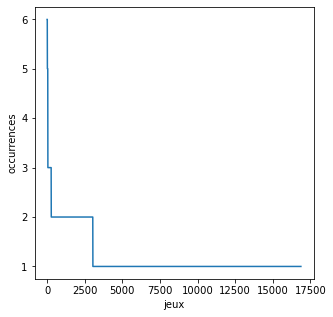

In [9]:
uniques_row = df_jeux_up.value_counts(dropna=False)

plt.figure(figsize=(5, 5))
plt.plot(uniques_row.values)
plt.xlabel("jeux")
plt.ylabel("occurrences")
plt.show()

- On note l'existence de jeux duppliqués dans la base de données.

In [10]:
print("On a", np.where(uniques_row.values != 1, 1, 0).sum(), "jeux duppliqués")

On a 3029 jeux duppliqués


**- Suppression des duplicatas**

In [11]:
df_jeux_up = df_jeux_up.drop_duplicates()

In [12]:
len_before = len(df_jeux)
len_after  = len(df_jeux_up)

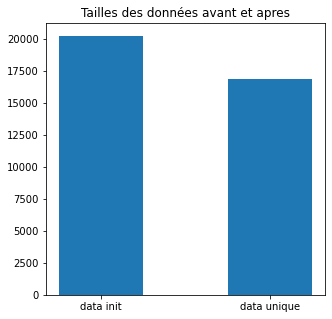

In [13]:
plt.figure(figsize=(5, 5))
plt.bar(['data init', 'data unique'], [len_before, len_after], width=0.5)
plt.title("Tailles des données avant et apres")
plt.show()

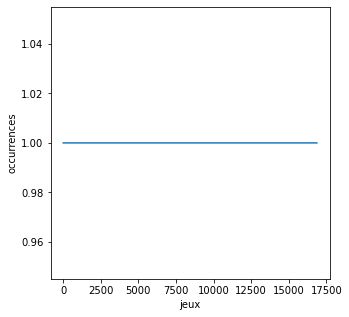

In [14]:
uniques_row = df_jeux_up.value_counts(dropna=False)

plt.figure(figsize=(5, 5))
plt.plot(uniques_row.values)
plt.xlabel("jeux")
plt.ylabel("occurrences")
plt.show()

In [15]:
df_jeux_up = df_jeux_up.drop(["full_title"], axis=1)

In [16]:
df_jeux_up.head()

,Nombre d'avis,casting,Note rectifiée,Note,url,Note Finkel,categories,Nombre d'avis rectifiés,description,gameplay,titre
0,19.0,Par Eric Lang et Andrea ChiarvesioIllustré par...,8.40,7.58,https://www.trictrac.net/jeu-de-societe/marvel...,8.74,NaN,10.0,\n Marvel United : Unis c...,1 à 4|14 ans et +|45,Marvel United
1,33.0,Par Elizabeth HargraveIllustré par Matt Paquet...,7.29,7.39,https://www.trictrac.net/jeu-de-societe/mariposas,7.68,NaN,17.0,"\n Chaque année, au print...",2 à 5|14 ans et +|60,Mariposas
2,28.0,Par Alexandre GarciaIllustré par Nastya LehnÉd...,7.22,8.18,https://www.trictrac.net/jeu-de-societe/quetzal,7.42,Enchères|Aventures dans la jungle|Collection /...,9.0,\n Vous êtes à la tête d’...,2 à 5|8 ans et +|45,Quetzal
3,4.0,Édité par Arkhane Asylum Publishing,0.00,9.00,https://www.trictrac.net/jeu-de-societe/alien-...,0.00,NaN,0.0,\n Un Kit de démarrage co...,à partir de 1|12 ans et +|~,Alien - Kit de Démarrage
4,72.0,Par Maxime Rambourg et Théo RivièreIllustré pa...,8.79,8.75,https://www.trictrac.net/jeu-de-societe/the-loop,9.70,Card-driven|Combinaison|Coopération|Deck build...,24.0,\n Le Dr Foo a créé une t...,1 à 4|12 ans et +|60,The LOOP


**- Création d'un nouvel identifiant**

- L'attribut `titre` peut servir d'identifiant pour les jeux, s'il est unique

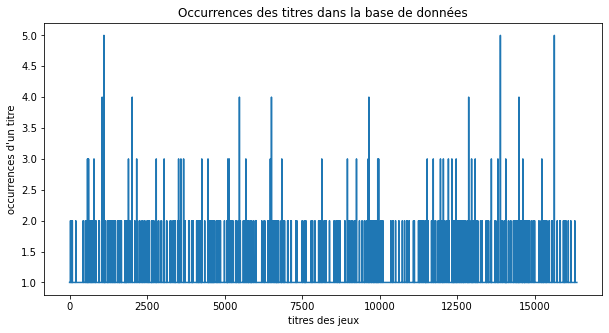

In [17]:
val, counts = np.unique(df_jeux_up["titre"], return_counts=True)

plt.figure(figsize=(10, 5))
plt.plot(counts)
plt.xlabel("titres des jeux")
plt.ylabel("occurrences d'un titre")
plt.title('Occurrences des titres dans la base de données')
plt.show()

On remarque que le titre n'est pas unique dans la base de données.

In [18]:
list_same_title = []

for v in val[counts != 1]:
    a = df_jeux_up[df_jeux_up["titre"] == v]
    
    if len(a) > 1:
        list_same_title.append(a)

In [19]:
list_same_title[29].head()[["titre", "url"]]

,titre,url
2115,Attila,https://www.trictrac.net/jeu-de-societe/attila-2
9594,Attila,https://www.trictrac.net/jeu-de-societe/attila-1
17498,Attila,https://www.trictrac.net/jeu-de-societe/attila-0
19870,Attila,https://www.trictrac.net/jeu-de-societe/attila


La répétition du titre dans la base de données est causée par l'existence des versions d'un jeu, ainsi deux versions d'un jeu ont le même titre.

Pour créer un identifiant suffit d'inclure la version du jeu dans le titre, et si on regard bien la version est présente dans l'url du jeu

In [20]:
df_jeux_up["_id"] = df_jeux_up.apply(traitement.update_title, axis=1)

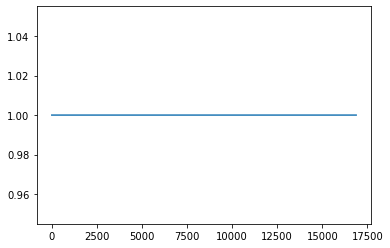

In [21]:
val, counts = np.unique(df_jeux_up["_id"], return_counts=True)

plt.plot(counts)
plt.show()

- Ainsi on a un attribut unique pour identifier un jeu

### 1.2 Castings :

In [22]:
df_jeux_up.head(3)["casting"]

0    Par Eric Lang et Andrea ChiarvesioIllustré par...
1    Par Elizabeth HargraveIllustré par Matt Paquet...
2    Par Alexandre GarciaIllustré par Nastya LehnÉd...
Name: casting, dtype: object

- Les castings d'un jeu sont l'ensemble de ses créateurs, illustrateurs, éditeurs et distributeurs

On décompose l'attribut `casting` pour récupérer ces informations

In [23]:
df_jeux_up["creators"] = df_jeux_up.apply(traitement.extract_creators, axis=1)
df_jeux_up["illustrators"] = df_jeux_up.apply(traitement.extract_illustrators, axis=1)
df_jeux_up["editors"] = df_jeux_up.apply(traitement.extract_editors, axis=1)
df_jeux_up["distributors"] = df_jeux_up.apply(traitement.extract_distributors, axis=1)

In [24]:
df_jeux_up.head(3)

,Nombre d'avis,casting,Note rectifiée,Note,url,Note Finkel,categories,Nombre d'avis rectifiés,description,gameplay,titre,_id,creators,illustrators,editors,distributors
0,19.0,Par Eric Lang et Andrea ChiarvesioIllustré par...,8.40,7.58,https://www.trictrac.net/jeu-de-societe/marvel...,8.74,NaN,10.0,\n Marvel United : Unis c...,1 à 4|14 ans et +|45,Marvel United,marvel-united,Eric Lang et Andrea Chiarvesio,Édouard Guiton,CMON Limited,NaN
1,33.0,Par Elizabeth HargraveIllustré par Matt Paquet...,7.29,7.39,https://www.trictrac.net/jeu-de-societe/mariposas,7.68,NaN,17.0,"\n Chaque année, au print...",2 à 5|14 ans et +|60,Mariposas,mariposas,Elizabeth Hargrave,Matt Paquette et Indi Maverick,Gigamic,NaN
2,28.0,Par Alexandre GarciaIllustré par Nastya LehnÉd...,7.22,8.18,https://www.trictrac.net/jeu-de-societe/quetzal,7.42,Enchères|Aventures dans la jungle|Collection /...,9.0,\n Vous êtes à la tête d’...,2 à 5|8 ans et +|45,Quetzal,quetzal,Alexandre Garcia,Nastya Lehn,Gigamic,NaN


In [25]:
print(df_jeux_up[["creators", "illustrators", "editors", "distributors"]].head(2).to_latex(index=False))

\begin{tabular}{llll}
\toprule
                      creators &                   illustrators &      editors & distributors \\
\midrule
Eric Lang et Andrea Chiarvesio &                 Édouard Guiton & CMON Limited &          NaN \\
            Elizabeth Hargrave & Matt Paquette et Indi Maverick &      Gigamic &          NaN \\
\bottomrule
\end{tabular}



### 1.3 gameplay :

In [26]:
df_jeux_up.head(3)["gameplay"]

0    1 à 4|14 ans et +|45 
1    2 à 5|14 ans et +|60 
2     2 à 5|8 ans et +|45 
Name: gameplay, dtype: object

Le gameplay d'un jeu est sous la forme : Nombre joueur | âge requis | durée d'une partie

In [27]:
df_jeux_up["nb_players"] = df_jeux_up.apply(traitement.extract_players, axis=1)
df_jeux_up["age_required"] = df_jeux_up.apply(traitement.extract_ages, axis=1)
df_jeux_up["duration"] = df_jeux_up.apply(traitement.extract_duration, axis=1)

In [28]:
df_jeux_up.head(3)

,Nombre d'avis,casting,Note rectifiée,Note,url,Note Finkel,categories,Nombre d'avis rectifiés,description,gameplay,titre,_id,creators,illustrators,editors,distributors,nb_players,age_required,duration
0,19.0,Par Eric Lang et Andrea ChiarvesioIllustré par...,8.40,7.58,https://www.trictrac.net/jeu-de-societe/marvel...,8.74,NaN,10.0,\n Marvel United : Unis c...,1 à 4|14 ans et +|45,Marvel United,marvel-united,Eric Lang et Andrea Chiarvesio,Édouard Guiton,CMON Limited,NaN,1-4,14-99,45.0
1,33.0,Par Elizabeth HargraveIllustré par Matt Paquet...,7.29,7.39,https://www.trictrac.net/jeu-de-societe/mariposas,7.68,NaN,17.0,"\n Chaque année, au print...",2 à 5|14 ans et +|60,Mariposas,mariposas,Elizabeth Hargrave,Matt Paquette et Indi Maverick,Gigamic,NaN,2-5,14-99,60.0
2,28.0,Par Alexandre GarciaIllustré par Nastya LehnÉd...,7.22,8.18,https://www.trictrac.net/jeu-de-societe/quetzal,7.42,Enchères|Aventures dans la jungle|Collection /...,9.0,\n Vous êtes à la tête d’...,2 à 5|8 ans et +|45,Quetzal,quetzal,Alexandre Garcia,Nastya Lehn,Gigamic,NaN,2-5,8-99,45.0


In [29]:
df_jeux_up[df_jeux_up["duration"].notna()]["duration"]

0         45.0
1         60.0
2         45.0
4         60.0
5         30.0
         ...  
20228     10.0
20229    180.0
20230    180.0
20231    240.0
20232     15.0
Name: duration, Length: 14134, dtype: float64

### L'age : 

On a décidé de créer 3 catégorie pour l'age : Enfant, ado et adultes

In [30]:
df_jeux_up = df_jeux_up.apply(traitement.onehot_ages, axis=1)

In [31]:
df_jeux_up.query('enfant == 0 & ado == 1 & adulte == 1').head(2)

,Nombre d'avis,casting,Note rectifiée,Note,url,Note Finkel,categories,Nombre d'avis rectifiés,description,gameplay,...,creators,illustrators,editors,distributors,nb_players,age_required,duration,enfant,ado,adulte
0,19.0,Par Eric Lang et Andrea ChiarvesioIllustré par...,8.40,7.58,https://www.trictrac.net/jeu-de-societe/marvel...,8.74,NaN,10.0,\n Marvel United : Unis c...,1 à 4|14 ans et +|45,...,Eric Lang et Andrea Chiarvesio,Édouard Guiton,CMON Limited,NaN,1-4,14-99,45.0,0,1,1
1,33.0,Par Elizabeth HargraveIllustré par Matt Paquet...,7.29,7.39,https://www.trictrac.net/jeu-de-societe/mariposas,7.68,NaN,17.0,"\n Chaque année, au print...",2 à 5|14 ans et +|60,...,Elizabeth Hargrave,Matt Paquette et Indi Maverick,Gigamic,NaN,2-5,14-99,60.0,0,1,1


### Nombre joueurs :

In [32]:
df_jeux_up = df_jeux_up.apply(traitement.onehot_playes, axis=1)

In [33]:
df_jeux_up.query('solo == 0 & duo == 1 & multi == 1').head(2)

,Nombre d'avis,casting,Note rectifiée,Note,url,Note Finkel,categories,Nombre d'avis rectifiés,description,gameplay,...,distributors,nb_players,age_required,duration,enfant,ado,adulte,solo,duo,multi
1,33.0,Par Elizabeth HargraveIllustré par Matt Paquet...,7.29,7.39,https://www.trictrac.net/jeu-de-societe/mariposas,7.68,NaN,17.0,"\n Chaque année, au print...",2 à 5|14 ans et +|60,...,NaN,2-5,14-99,60.0,0,1,1,0,1,1
2,28.0,Par Alexandre GarciaIllustré par Nastya LehnÉd...,7.22,8.18,https://www.trictrac.net/jeu-de-societe/quetzal,7.42,Enchères|Aventures dans la jungle|Collection /...,9.0,\n Vous êtes à la tête d’...,2 à 5|8 ans et +|45,...,NaN,2-5,8-99,45.0,0,1,1,0,1,1


In [34]:
df_jeux_up["duration"] = df_jeux_up["duration"].map(lambda x: 0 if x < 0 else x).map(lambda x: 120 if x > 120 else x)

### 1.4 Suppression des attributs inutiles :

In [35]:
df_jeux_up = df_jeux_up.drop(["url", "casting", "gameplay", "nb_players", "age_required", "Note rectifiée", "Note Finkel", "Nombre d'avis rectifiés"], axis=1)

## 2. Données des avis (`avis.bson`) :

In [36]:
df_avis.head(2)

,comment,date_published,_id,title_review,url,title,note,review_href,author,treated
0,"Lorsque le jeu est jeu, bon, réflexif, joli po...",2021-01-27 11:06:44,63c6726ea81f3e3016af9a56,Voyages sur les ailes des papillons,https://www.trictrac.net/jeu-de-societe/maripo...,Mariposas,8.0,https://www.trictrac.net/avis/vraiment-bon-12514,Monsieur Guillaume,True
1,Comment continuer après un mega hit ? Simpleme...,2020-10-18 10:04:21,63c6726ea81f3e3016af9a57,le festival de Michoacan,https://www.trictrac.net/jeu-de-societe/maripo...,Mariposas,7.0,https://www.trictrac.net/avis/le-festival-de-m...,morlockbob,True


In [37]:
df_avis.shape

(246524, 10)

In [38]:
df_avis.columns

Index(['comment', 'date_published', '_id', 'title_review', 'url', 'title',
       'note', 'review_href', 'author', 'treated'],
      dtype='object')

### 2.1 Identifiant d'un avis :

Comme pour les jeux, l'attribut `_id` est généré lors du scrapping,il souffre du même problème.

In [39]:
df_avis.head(1)

,comment,date_published,_id,title_review,url,title,note,review_href,author,treated
0,"Lorsque le jeu est jeu, bon, réflexif, joli po...",2021-01-27 11:06:44,63c6726ea81f3e3016af9a56,Voyages sur les ailes des papillons,https://www.trictrac.net/jeu-de-societe/maripo...,Mariposas,8.0,https://www.trictrac.net/avis/vraiment-bon-12514,Monsieur Guillaume,True


In [40]:
df_avis_up = df_avis.drop(["_id"], axis=1)

In [41]:
df_avis_up.head(1)

,comment,date_published,title_review,url,title,note,review_href,author,treated
0,"Lorsque le jeu est jeu, bon, réflexif, joli po...",2021-01-27 11:06:44,Voyages sur les ailes des papillons,https://www.trictrac.net/jeu-de-societe/maripo...,Mariposas,8.0,https://www.trictrac.net/avis/vraiment-bon-12514,Monsieur Guillaume,True


**- Comptage du nombre d'occurrences de chaque ligne (avis) du dataframe**

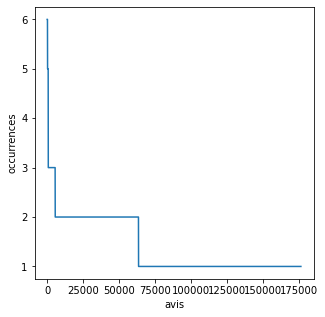

In [42]:
uniques_row = df_avis_up.value_counts(dropna=False)

plt.figure(figsize=(5, 5))
plt.plot(uniques_row.values)
plt.xlabel("avis")
plt.ylabel("occurrences")
plt.show()

- On note l'existence d'avis duppliqués dans la base de données.

In [43]:
print("On a", np.where(uniques_row.values != 1, 1, 0).sum(), "avis duppliqués")

On a 63375 avis duppliqués


**- Suppression des duplicatas**

In [44]:
df_avis_up = df_avis_up.drop_duplicates()

In [45]:
len_before = len(df_avis)
len_after  = len(df_avis_up)

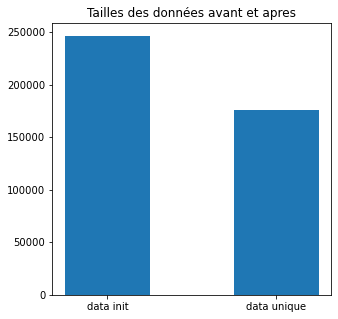

In [46]:
plt.figure(figsize=(5, 5))
plt.bar(['data init', 'data unique'], [len_before, len_after], width=0.5)
plt.title("Tailles des données avant et apres")
plt.show()

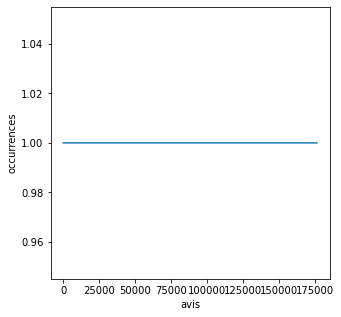

In [47]:
uniques_row = df_avis_up.value_counts(dropna=False)

plt.figure(figsize=(5, 5))
plt.plot(uniques_row.values)
plt.xlabel("avis")
plt.ylabel("occurrences")
plt.show()

### 2.2 Référence vers le jeu dans l'avis :

Comme l'identifiant d'un jeu est maintenant son titre et sa version, afin de conserver une base de données relationnelle nous devons adapter la référence au jeu dans la revue.

In [48]:
df_avis_up["title_id_jeu"] = df_avis_up.apply(traitement.update_title, axis=1)

In [49]:
np.unique(df_avis_up[df_avis_up["title"] == "1830"]["title_id_jeu"])

array(['1830', '1830-0'], dtype=object)

In [50]:
print("Nombre de jeux sans version ", len(np.unique(df_avis_up["title"])))
print("Nombre de jeux avec version ", len(np.unique(df_avis_up["title_id_jeu"])))

Nombre de jeux sans version  10709
Nombre de jeux avec version  10936


### 2.3 Suppression des attributs inutiles :

On drop les attributs `url` et `review_href` car ils ne nous seront plus utiles.

In [51]:
df_avis_up = df_avis_up.drop(["url", "review_href", "treated" ], axis=1)

In [52]:
df_avis_up.head(2)

,comment,date_published,title_review,title,note,author,title_id_jeu
0,"Lorsque le jeu est jeu, bon, réflexif, joli po...",2021-01-27 11:06:44,Voyages sur les ailes des papillons,Mariposas,8.0,Monsieur Guillaume,mariposas
1,Comment continuer après un mega hit ? Simpleme...,2020-10-18 10:04:21,le festival de Michoacan,Mariposas,7.0,morlockbob,mariposas


### 2.4 Date de publication :

On garde seulement l'année de publication

In [53]:
df_avis_up["date_published"] = df_avis_up.apply(traitement.extract_published_year, axis=1)

In [54]:
df_avis_up.head(2)

,comment,date_published,title_review,title,note,author,title_id_jeu
0,"Lorsque le jeu est jeu, bon, réflexif, joli po...",2021,Voyages sur les ailes des papillons,Mariposas,8.0,Monsieur Guillaume,mariposas
1,Comment continuer après un mega hit ? Simpleme...,2020,le festival de Michoacan,Mariposas,7.0,morlockbob,mariposas


## II. Sauvegarde des nouveaux dataframe : 

In [55]:
df_avis_up.to_csv('../data/avis_clean.csv', index=False)

In [56]:
df_jeux_up.to_csv('../data/details_clean.csv', index=False)